In [1]:
import collections
import os
import math

import pandas as pd
from sklearn import preprocessing
import numpy as np

import json
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import random
from collections import Counter

from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
df = pd.read_csv("C:\\Users\\giuli\\Desktop\\ds Left\\merged\\mergedFileLeft.csv")
df_clusters = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\col_heat_base_left.json')

df_clusters

,View,1_clusters,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,,0,0,1,0,1,2,0,0,1,...,2,8,8,10,8,4,8,0,1,26
1,a,0,0,1,3,3,4,2,4,4,...,3,0,15,13,15,13,2,15,12,18
2,b,0,0,2,2,2,1,5,7,3,...,5,5,1,3,3,3,9,3,25,23
3,c,0,0,1,0,1,2,0,0,8,...,4,2,4,7,1,1,1,24,5,24
4,d,0,0,1,0,1,2,0,0,8,...,0,7,5,0,21,5,0,10,11,12
5,e,0,0,1,0,1,2,0,0,8,...,0,7,5,0,4,21,7,8,20,9
6,f,0,0,1,0,1,2,0,0,8,...,4,2,4,7,1,22,21,2,3,8
7,g,0,0,2,2,2,1,5,7,3,...,5,5,1,3,3,3,9,3,7,25
8,h,0,0,2,2,2,1,5,1,0,...,9,15,13,16,13,7,5,20,6,4
9,i,0,1,0,1,0,3,4,3,5,...,13,1,17,15,5,17,17,12,4,19


In [3]:
df_labels = pd.read_json('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\labels_clusters_left.json')


df_labels

,2_clusters,3_clusters,4_clusters,5_clusters,6_clusters,7_clusters,8_clusters,9_clusters,10_clusters,11_clusters,...,18_clusters,19_clusters,20_clusters,21_clusters,22_clusters,23_clusters,24_clusters,25_clusters,26_clusters,27_clusters
0,0,2,2,2,1,5,1,0,4,5,...,1,11,9,20,19,18,20,19,18,7
1,0,2,2,2,1,5,1,0,4,5,...,9,15,13,16,13,7,5,20,6,4
2,0,1,0,1,2,0,0,8,1,2,...,0,7,5,0,4,21,7,8,20,9
3,0,1,0,1,2,0,0,1,0,4,...,2,8,8,10,8,4,8,0,1,26
4,0,2,2,2,1,5,1,0,4,5,...,1,11,9,1,18,19,11,6,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16757,0,1,0,1,2,0,0,1,0,4,...,2,8,8,10,8,4,8,0,1,26
16758,0,1,0,1,2,6,6,7,8,8,...,11,12,2,6,14,16,15,5,8,11
16759,0,1,3,3,4,2,4,4,9,0,...,3,0,15,13,15,13,2,15,12,18
16760,0,1,0,1,2,0,0,8,1,2,...,4,2,4,7,1,1,1,24,5,24


In [4]:
def load_words():
    with open('C:\\Users\\giuli\\Desktop\\PythonTesi\\jsonFile\\words_alpha.txt') as word_file:
        valid_words = set(word_file.read().split())
    return valid_words

dictionary = load_words()
print('fatality' in dictionary)

True


In [5]:
####### WORKS ONLY FOR WORD APP, CHECK WordRecGraph FOR ALL WORDS IN TEST SET ######

df_word = df
print(len(df_word))
# last_column_labels = df_labels.iloc[:, -1:]

def get_index_split():
    #indice per splittare in due il df
    train_df_split_len = int((2 * len(df_word))/3) #17.083
    view_row_train = df_word.iloc[train_df_split_len]['View']
    print("indice prima", train_df_split_len, view_row_train)
    true_train_split = 0
    if train_df_split_len != ' ':
        for index, row in df_word.iterrows():
            if index >= train_df_split_len:
                if row['View'] == ' ':
                    true_train_split = index
                    # print(true_train_split, row['View'])

            if true_train_split != 0:
                break
    else:
        true_train_split = train_df_split_len

    print("indice dopo", true_train_split)
    return true_train_split

def divide_dataset():
    true_train_split = get_index_split()
    train_df = df_word.iloc[:true_train_split, :]
    test_df = df_word.iloc[true_train_split:, :]
    print("train", train_df.shape, "test", test_df.shape)
    print("index", test_df.index[0])

    keep = []
    index_first_element = test_df.index[0]
    print(test_df.index[0], test_df.index[-1]+1)
    for i,_ in enumerate(range(test_df.index[0], test_df.index[-1]+1)):
        # print(i, _)
        if (test_df.View[index_first_element]=='a') & (test_df.View[index_first_element+1] =='p') \
                & (test_df.View[index_first_element+2] =='p'):
            keep.append(i)
            keep.append(i+1)
            keep.append(i+2)
        if index_first_element+3 == len(df):
            # print('b')
            break
        index_first_element += 1

    if len(keep) == 0:
        print("non è in test set")
    print(keep)
    # df_word_app cotiene tutte le righe con 'app' consecutivi
    df_word_app = test_df.iloc[keep]
    # print(keep)
    # df_word_app = df_word_app.iloc[-3:]
    df_word_app = df_word_app.iloc[:3]

    return df_word_app, train_df, test_df
    # df_word_app = df_word_app.iloc[-1]

16762


In [6]:
def leave_one_out_cv_test():
    df_word2 = df
    keep = []
    for i in range(len(df) - 2):
        if (df.View[i]=='a') & (df.View[i+1] =='p') & (df.View[i+2] =='p'):
            keep.append(i)
            keep.append(i+1)
            keep.append(i+2)

    if len(keep) == 0:
        print("non è in test set")

    df_word2_app = df_word2.iloc[keep]
    # print(keep)
    # df_word2_app = df_word2_app.iloc[-3:]
    df_word2_app = df_word2_app.iloc[:3]
    indexes_to_del = []
    for i in range(len(df_word2_app)):
        print(df_word2_app.index[i])
        indexes_to_del.append(df_word2_app.index[i])

    # print(df_word2.iloc[25106]['View'], df_word2.iloc[25107]['View'], df_word2.iloc[25108]['View'])
    # df_word2 = df_word2.drop([25106, 25107, 25108]) #25622
    df_word2 = df_word2.drop(indexes_to_del)

    index_space2 = df_word2[ df_word2['View'] == ' ' ].index
    df_word2.drop(index_space2, inplace=True)

    X_word2_app = df_word2_app.drop(['View','User','Hand', 'Smartphone'], axis=1)
    X_word2_app = np.array(X_word2_app)

    y_word2_app = np.array(df_word2_app['View'])

    features2 = df_word2.drop(['View','User','Hand', 'Smartphone'], axis=1)

    labels2 = np.array(df_word2['View'])
    features2 = np.array(features2)

    return X_word2_app, y_word2_app, features2, labels2

In [7]:

def get_predict_value():

    df_word_app, train_df, test_df = divide_dataset()
    X_word_app = df_word_app.drop(['View','User','Hand', 'Smartphone'], axis=1)
    X_word_app = np.array(X_word_app)

    y_word_app = np.array(df_word_app['View'])
    print(y_word_app)
    #app
    # print(df_word.iloc[25106]['View'], df_word.iloc[25107]['View'], df_word.iloc[25108]['View'])
    # df_word = df_word.drop([25106, 25107, 25108]) #25622

    # remove spaces
    index_space = train_df.loc[ train_df['View'] == ' ' ].index
    train_df.drop(index_space, inplace=True)

    features = train_df.drop(['View','User','Hand', 'Smartphone'], axis=1)

    labels = np.array(train_df['View'])
    features = np.array(features)

    model = RandomForestClassifier(n_estimators = 100, random_state = 42)
    # model = SVC(C=1.0, kernel='linear', gamma='auto', random_state=42)

    # leave_one_out_cv_test()
    # X_app, y_app, X_t, y_t = get_all_df()
    # print("RFC")
    # model.fit(X_t, y_t)
    # for index, value in enumerate(X_app):
    #     y_pred = model.predict([value])
    #     # accuracy = round(metrics.accuracy_score(y_word_app[index], y_pred) * 100, 2)
    #     print(y_pred)
    #     # print(accuracy)

    final_word = ""

    print("RFC")
    model.fit(features, labels)
    for index, value in enumerate(X_word_app):
        y_pred = model.predict([value])
        # accuracy = round(metrics.accuracy_score(y_word_app[index], y_pred) * 100, 2)
        print(y_pred)
        final_word += y_pred[0]
        # print(accuracy)

    return final_word

word_predicted = get_predict_value()
print(word_predicted)

indice prima 11174 f
indice dopo 11179
train (11179, 280) test (5583, 280)
index 11179
11179 16762
[179, 180, 181, 2389, 2390, 2391, 2717, 2718, 2719, 3508, 3509, 3510]
['a' 'p' 'p']
RFC


c:\users\giuli\desktop\pythontesi\venv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


['a']
['o']
['o']
aoo


In [8]:
def hierarchy_pos(G, root=None, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5):

    '''
    From Joel's answer at https://stackoverflow.com/a/29597209/2966723.
    Licensed under Creative Commons Attribution-Share Alike

    If the graph is a tree this will return the positions to plot this in a
    hierarchical layout.

    G: the graph (must be a tree)

    root: the root node of current branch
    - if the tree is directed and this is not given,
      the root will be found and used
    - if the tree is directed and this is given, then
      the positions will be just for the descendants of this node.
    - if the tree is undirected and not given,
      then a random choice will be used.

    width: horizontal space allocated for this branch - avoids overlap with other branches

    vert_gap: gap between levels of hierarchy

    vert_loc: vertical location of root

    xcenter: horizontal location of root
    '''
    if not nx.is_tree(G):
        raise TypeError('cannot use hierarchy_pos on a graph that is not a tree')

    if root is None:
        if isinstance(G, nx.DiGraph):
            root = next(iter(nx.topological_sort(G)))  #allows back compatibility with nx version 1.11
        else:
            root = random.choice(list(G.nodes))

    def _hierarchy_pos(G, root, width=1., vert_gap = 0.2, vert_loc = 0, xcenter = 0.5, pos = None, parent = None):
        '''
        see hierarchy_pos docstring for most arguments

        pos: a dict saying where all nodes go if they have been assigned
        parent: parent of this branch. - only affects it if non-directed

        '''

        if pos is None:
            pos = {root:(xcenter,vert_loc)}
        else:
            pos[root] = (xcenter, vert_loc)
        children = list(G.neighbors(root))
        if not isinstance(G, nx.DiGraph) and parent is not None:
            children.remove(parent)
        if len(children)!=0:
            dx = width/len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos = _hierarchy_pos(G,child, width = dx, vert_gap = vert_gap,
                                    vert_loc = vert_loc-vert_gap, xcenter=nextx,
                                    pos=pos, parent = root)
        return pos


    return _hierarchy_pos(G, root, width, vert_gap, vert_loc, xcenter)

In [9]:
def remove_red_nodes(graph, paths):

    color_nodes = nx.get_node_attributes(graph, 'color')
    # print(color_nodes)
    to_remove = []

    for path in paths:
        for p in path:
            desc = nx.descendants(graph, p)
            # se il colore del nodo è rosso, non è una foglia e ha discendenti
            print(color_nodes[p])
            if color_nodes[p] == "red" and graph.out_degree(p) != 0 and len(desc) != 0:

                for el in list(desc):
                    if not el in to_remove:
                        to_remove.append(el)
                # se il colore del nodo è arancione o verde
            # elif color_nodes[p] == "orange" or color_nodes[p] == "#00FF00":
            #
            #     succ = list(graph.successors(p))
            #
            #     num_red = 0
            #     num_orange = 0
            #     red_weight = 0
            #
            #     node_to_update = []
            #     red_to_0 = []
            #
            #     # conto il numero di rossi e arancioni
            #     for s in succ:
            #         if color_nodes[s] == "red":
            #             num_red += 1
            #             red_weight = graph[p][s]['weight']
            #             red_to_0.append(s)
            #         else:
            #             num_orange += 1
            #             node_to_update.append(s)
            #
            #     #aggiorno la weight
            #     if num_red != 0 and num_orange != 0:
            #         for node in node_to_update:
            #             # graph[p][node]['weight'] = round(graph[p][node]['weight'] + ((red_weight * num_red) / num_orange), 2)
            #             graph[p][node]['weight'] = round(100.0 / num_orange, 2)
            #
            #             # if graph[p][node]['weight'] > 100.0:
            #             #     graph[p][node]['weight'] = 100.0
            #
            #     if len(red_to_0) > 0:
            #         for node in red_to_0:
            #             graph[p][node]['weight'] = 0



    # print("to_remove", to_remove)

    # for r in to_remove:
    #     graph.remove_node(r)

    # print(graph.nodes)

    color_nodes = nx.get_node_attributes(graph, 'color')

    color_update = [color_nodes.get(node) for node in graph.nodes]
    labels = nx.get_node_attributes(graph, 'value')
    # weight = nx.get_edge_attributes(graph,'weight')

    # print(len(color_update))

    # return [graph, color_update, labels, weight]
    return [graph, color_update, labels]


In [10]:
def change_color_nodes(graph, tree, word):
    nodes = graph.nodes()
    paths_color = []
    roots = []
    for t in tree:
        roots.append(t[0])
    # print("roots", roots)
    ind = 0
    for root in roots:
        # tree_nodes = tree.pop(0)
        tree_nodes = tree[ind]
        if 0 in tree_nodes:
            tree_nodes.remove(0)
        # print(tree_nodes)
        for t in tree_nodes:
            if graph.out_degree(t)==0: #it's a leaf
                # print(nx.shortest_path(graph, root, t))
                paths_color.append(nx.shortest_path(graph, root, t))
                # print(paths_color, t)
        ind += 1

    # print("paths", paths)
    labels = nx.get_node_attributes(graph, 'value')
    colors = nx.get_node_attributes(graph, 'color')

    # colors[0] = "white"
    for i in range(len(graph.nodes)):
        colors[i] = "white"
    green_node = []
    isGreen = False

    for path in paths_color:
        check_word = ''
        true_node = []
        for p in path:
            # print(labels[p])
            check_word = check_word + labels[p]
            true_node.append(p)
            # print(check_word)
            if len(check_word) == len(word):
                if not check_word in dictionary:
                    # colors[p] = "red"
                    for c in true_node:
                        if colors[c] != "orange":
                            colors[c] = "red"
                elif check_word in dictionary:
                    for c in true_node:
                        colors[c] = "orange"
                    # colors[p] = "orange"

            if word.startswith(check_word, 0, len(word)):
                green_node.append(p)

        if check_word == word and word in dictionary:
            isGreen = True

        # print(check_word == word, check_word in dictionary)
        # if check_word == word and check_word in dictionary:
        #     for p in path:
        #         colors[p] = "#00FF00"

    if isGreen:
        max_value = max(green_node)
        max_index = green_node.index(max_value)

        green_node = green_node[:max_index+1]
        green_node = green_node[-len(word):]
        # print("green_node", green_node)

        for p in green_node:
            colors[p] = "#00FF00"

    for path in paths:
        for p in path:
            desc = nx.descendants(graph, p)
            for d in list(desc):
                if colors[d] == "orange" and colors[p] == "red":
                    colors[p] = "orange"


    nx.set_node_attributes(graph, colors, "color")

    plt.figure(figsize=(18,10), dpi=100)
    # ax = plt.gca()
    # ax.set_title('Word: ' + word + "; Clusters Number: " + cluster)

    options = {"edgecolors": "k", "node_size": 400}
    options_center = {"edgecolors": "k", "node_size": 1000}


    # new_graph_and_color = list(change_color_nodes(F, node_to_check, word))

    # QUESTO E' GIUSTO
    pos = hierarchy_pos(graph, 0, width = 2*math.pi, xcenter=0)
    new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}


    labels = nx.get_node_attributes(graph, 'value')
    nx.draw_networkx_labels(graph, new_pos, labels, font_color='black')
    # labels = new_graph_and_color[2]
    # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')

    weight = nx.get_edge_attributes(graph,'weight')
    nx.draw_networkx_edge_labels(graph, new_pos, edge_labels=weight)
    # weight = values[3]
    # final_weight ={}
    # for key in weight:
    #     if weight[key] != 0:
    #         final_weight[key] = weight[key]
    # nx.draw_networkx_edge_labels(values[0], new_pos, edge_labels=final_weight)

    # nx.draw(new_graph_and_color[0], pos=new_pos, node_color = new_graph_and_color[1], **options, ax=ax)
    color_update = [colors.get(node) for node in graph.nodes]
    nx.draw(graph, node_color = color_update, pos=new_pos, **options)
    nx.draw_networkx_nodes(graph, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)

    # color_update = [colors.get(node) for node in graph.nodes]
    # labels = nx.get_node_attributes(graph, 'value')
    # weight = nx.get_edge_attributes(graph,'weight')

    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "final_graph_colored_" + word + ".png",
                    bbox_inches='tight')



    # values = remove_red_nodes(graph, paths)

    # plt.figure(figsize=(18,10), dpi=100)
    # # ax = plt.gca()
    # # ax.set_title('Word: ' + word + "; Clusters Number: " + cluster)
    #
    # options = {"edgecolors": "k", "node_size": 400}
    # options_center = {"edgecolors": "k", "node_size": 1000}
    #
    #
    # # new_graph_and_color = list(change_color_nodes(F, node_to_check, word))
    #
    #
    # pos = hierarchy_pos(values[0], 0, width = 2*math.pi, xcenter=0)
    # new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}
    #
    #
    # # labels = nx.get_node_attributes(F, 'value')
    # nx.draw_networkx_labels(values[0], new_pos, values[2], font_color='black')
    # # labels = new_graph_and_color[2]
    # # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')
    #
    # weight = nx.get_edge_attributes(values[0],'weight')
    # nx.draw_networkx_edge_labels(values[0], new_pos, edge_labels=weight)
    # # weight = values[3]
    # # final_weight ={}
    # # for key in weight:
    # #     if weight[key] != 0:
    # #         final_weight[key] = weight[key]
    # # nx.draw_networkx_edge_labels(values[0], new_pos, edge_labels=final_weight)
    #
    # # nx.draw(new_graph_and_color[0], pos=new_pos, node_color = new_graph_and_color[1], **options, ax=ax)
    # nx.draw(values[0], node_color = values[1], pos=new_pos, **options)
    # nx.draw_networkx_nodes(values[0], pos=new_pos, nodelist = [0], node_color = 'white', **options_center)
    #
    # # color_update = [colors.get(node) for node in graph.nodes]
    # # labels = nx.get_node_attributes(graph, 'value')
    # # weight = nx.get_edge_attributes(graph,'weight')
    #
    # plt.savefig("C:\\Users\\giuli\\Desktop\\grafi bianchi e finale\\" + "final_graph_colored2_" + word + ".png",
    #                 bbox_inches='tight')

#   return [values[0], values[1], values[2], values[3]]
    # [graph, color_update, labels, weight]
    # return [graph, color_update, labels, weight]

In [11]:
def graph_from_word(word, cluster):
    # divido le lettere della parola la parola
    word_splitted = [char for char in word]
    print(word_splitted)

    G = nx.DiGraph()
    character_to_write = []
    depth_tree = 1
    sequence_char = []
    F = G
    weight_list = []

    # per ogni lettera calcolo in che cluster si trova in base al parametro cluster
    for let in word_splitted:
        print("lettera: ", let)
        # prende l'indice della riga della prima lettera della parola
        row_of_character = df_clusters.index[df_clusters['View'] == let].tolist()

        # prende le colonne di quell'indice di sopra
        col_of_word = df_clusters.iloc[row_of_character]
        # elimino la colonna della view
        col_of_word = col_of_word.iloc[:, 1:]
        num_cluster = col_of_word[cluster]
        # cluster a cui appartiene la lettera
        num_cluster = num_cluster.iloc[-1]
        print(num_cluster)
        seq = ''
        ele_in_cluster = 0
        for index, row in df_clusters.iterrows():
            if row[cluster] == num_cluster and row['View'] != ' ':
                # print(row['View'])
                character_to_write.append((depth_tree, row['View']))

                seq = seq + row['View']
                ele_in_cluster += 1
                # print(seq)
        print("ele_in_cluster", ele_in_cluster)

        sequence_char.append((depth_tree, seq))
        weight_list.append((depth_tree, ele_in_cluster))

        depth_tree += 1

    # print("weight_list", weight_list)
    # print(character_to_write)
    # print("sequence_char", sequence_char)

    G.add_node(0, value="start")

    first_char = sequence_char[0]
    first_char = [char for char in first_char]
    first_char = first_char[1]
    # print(first_char)

    character_to_write = character_to_write[len(first_char):]
    # print("character_to_write", character_to_write)

    char_copy = []

    for el in character_to_write:
        for w in weight_list:
            if el[0] == w[0]:
                el = el + (w[1],)
                char_copy.append(el)

    character_to_write = char_copy
    # print("character_to_write", character_to_write)

    trees_to_draw = []
    n_node = 0
    first_node_str = []
    # creo le tuple degli alberi che andrò a rappresentare
    for char in first_char:
        (p, q) = weight_list[0]
        n_node += 1
        tree = [(1, char, q, n_node)]
        first_node_str.append(n_node)
        for el in character_to_write:

            n_node += 1
            el = el + (n_node,)
            tree.append(el)

        trees_to_draw.append(tree)
        # print(len(tree))
        # print(tree)

    # print(trees_to_draw)

    index_node = 1
    node_to_check = []
    edge_tree = []
    # per ognuno degli alberi in trees_to_draw creo un nuovo grafo per poi combinarlo con quello globale
    for t in trees_to_draw:
        H = nx.DiGraph()
        depth_act = 1

        nodi_padre_vecchio = [0]
        nodi_padre_nuovo = []

        for depth, let, weight, num_node in t:

            if depth != depth_act:
                nodi_padre_vecchio = nodi_padre_nuovo
                nodi_padre_nuovo = []

            for n in nodi_padre_vecchio:
                H.add_node(index_node, value=let)
                nodi_padre_nuovo.append(index_node)

                weight_to_add = round((1/weight) * 100, 2)
                H.add_edges_from([(n, index_node)], weight=weight_to_add)

                index_node += 1
            depth_act = depth

        node_to_check.append(list(H.nodes))
        edge_tree.append(H.edges)

        F = nx.compose(F, H)


    print(edge_tree)
    # print(node_to_check)


    plt.figure(figsize=(18,10), dpi=100)
    ax = plt.gca()
    ax.set_title('Word: ' + word + "; Clusters Number: " + cluster)

    options = {"edgecolors": "k", "node_size": 400}
    options_center = {"edgecolors": "k", "node_size": 1000}


    # new_graph_and_color = list(change_color_nodes(F, node_to_check, word))


    pos = hierarchy_pos(F, 0, width = 2*math.pi, xcenter=0)
    new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}


    labels = nx.get_node_attributes(F, 'value')
    nx.draw_networkx_labels(F, new_pos, labels, font_color='black')
    # labels = new_graph_and_color[2]
    # nx.draw_networkx_labels(F, new_pos, labels, font_color='black')

    # weight = nx.get_edge_attributes(F,'weight')
    # nx.draw_networkx_edge_labels(F, new_pos, edge_labels=weight)
    # weight = new_graph_and_color[3]
    # final_weight ={}
    # for key in weight:
    #     if weight[key] != 0:
    #         final_weight[key] = weight[key]
    # nx.draw_networkx_edge_labels(F, new_pos, edge_labels=final_weight)

    # nx.draw(new_graph_and_color[0], pos=new_pos, node_color = new_graph_and_color[1], **options, ax=ax)
    nx.draw(F, node_color = 'white', pos=new_pos, **options, ax=ax)
    nx.draw_networkx_nodes(F, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)


    plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + cluster + "_graph_" + word + ".png",
                bbox_inches='tight')

    # node_to_check contiene i nodi di ogni albero
    return F, node_to_check, edge_tree

['a', 'o', 'o']
lettera:  a
9
ele_in_cluster 2
lettera:  o
6
ele_in_cluster 2
lettera:  o
6
ele_in_cluster 2
[OutEdgeView([(1, 2), (1, 3), (0, 1), (2, 4), (2, 6), (3, 5), (3, 7)]), OutEdgeView([(8, 9), (8, 10), (0, 8), (9, 11), (9, 13), (10, 12), (10, 14)])]
['a', 'o', 'o']
lettera:  a
15
ele_in_cluster 1
lettera:  o
11
ele_in_cluster 1
lettera:  o
11
ele_in_cluster 1
[OutEdgeView([(1, 2), (0, 1), (2, 3)])]
['a', 'o', 'o']
lettera:  a
18
ele_in_cluster 1
lettera:  o
15
ele_in_cluster 1
lettera:  o
15
ele_in_cluster 1
[OutEdgeView([(1, 2), (0, 1), (2, 3)])]
list_of_graph 3


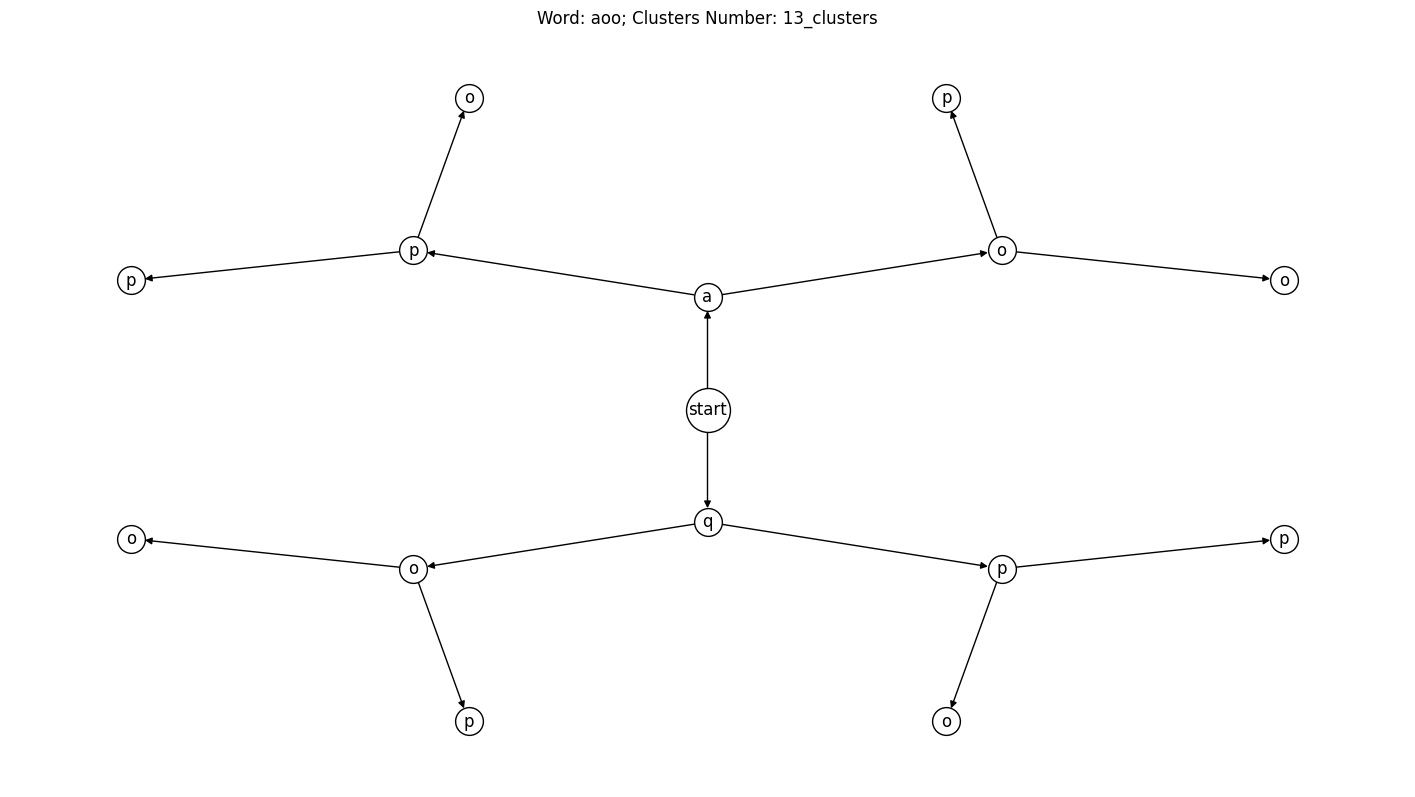

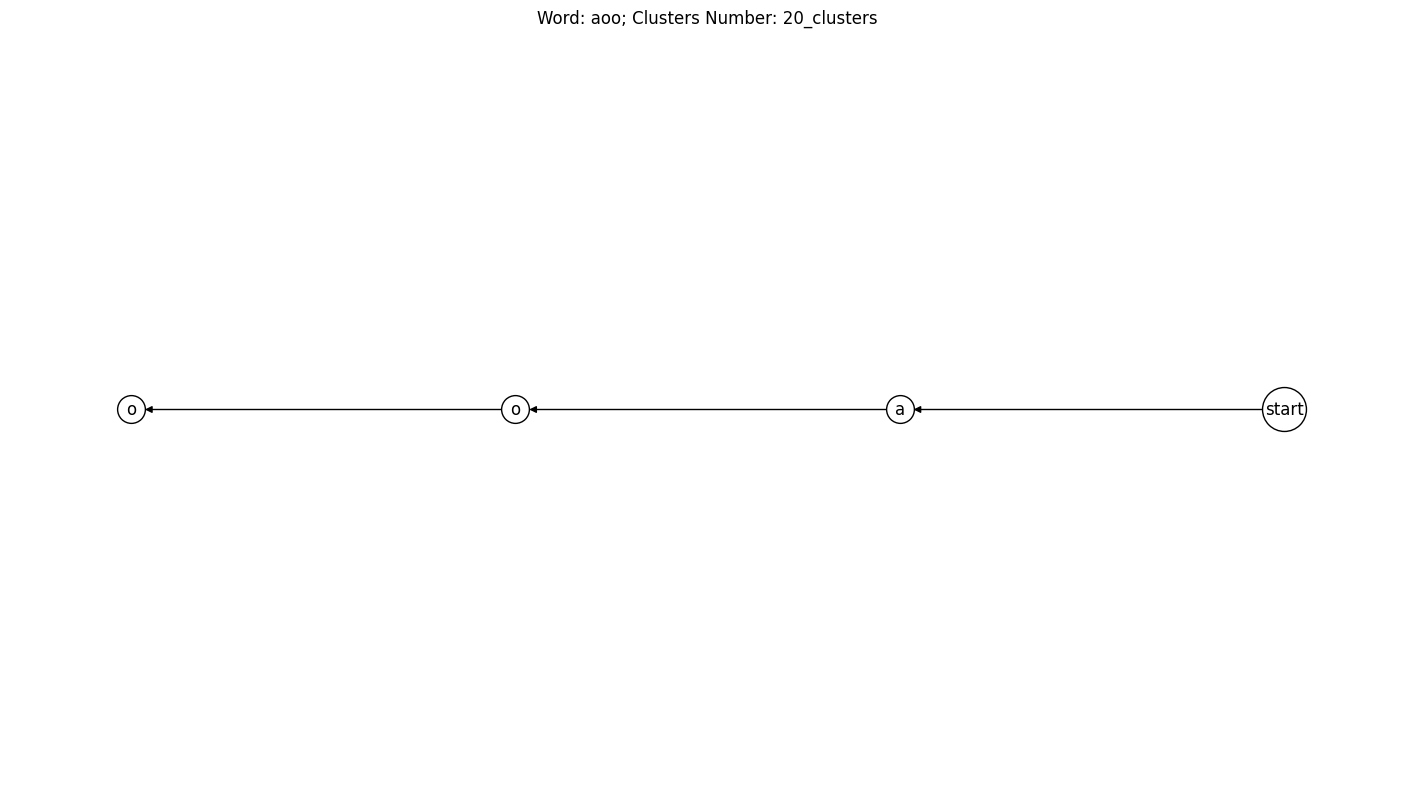

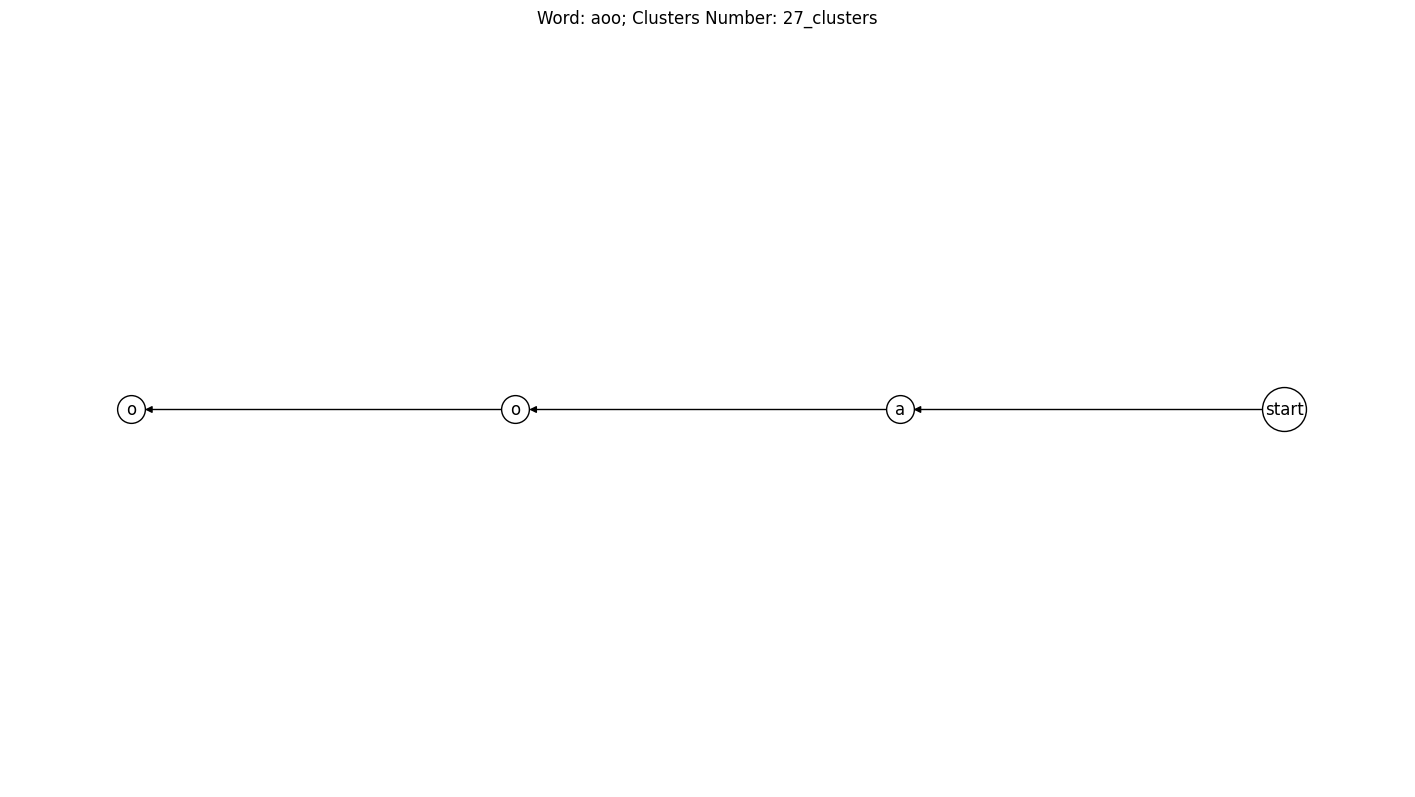

In [12]:
configuration = [13, 20, 27]
list_of_graph = []

word = word_predicted
# word = "app"
# per ogni clusterizzazione nella configurazione creo il grafo
for conf in configuration:
    graph, tree, edges = graph_from_word(word, str(conf) + "_clusters")
    list_of_graph.append((graph, tree, edges))

print("list_of_graph", len(list_of_graph))

In [46]:
# cambia colore e nodi al grafo bianco iniziale (Grafi intermedi)
# change_color_nodes(graph, tree, word)

In [13]:
# already_exist = []

map_fin = collections.defaultdict(list)

# per ogni grafo della configurazione

for graph_ret, tree_ret, edges_tree in list_of_graph:

    print("NUOVO GRAFO")


    # labels dei nodi del grafo
    labels = nx.get_node_attributes(graph_ret, 'value')
    # distanze dal nodo 0 (start)
    distance = nx.shortest_path_length(graph_ret, 0)

    # calcola i percorsi partendo da 0
    paths = []
    for tree in tree_ret:
        for t in tree:
            if t == 0:
                continue
            else:
                if graph_ret.out_degree(t)==0: #it's a leaf
                    paths.append(nx.shortest_path(graph_ret, 0, t))


    map_level = collections.defaultdict(list)
    for path in paths:
        each_path = ['start']
        for p in path:
            if p == 0:
                continue
            else:
                # profondità del nodo p
                level = distance.get(p)
                # lettera del nodo p
                letter = labels.get(p)
                # each_path contiene i percorsi con labels al posto dei numeri
                each_path.append(letter)

                initial_tuple = (level, 1)
                end_tuple = ()
                for el in each_path:
                    end_tuple = end_tuple + (el,)
                    # print(end_tuple)
                tup = initial_tuple + end_tuple
                if tup not in map_level[level]:
                    map_level[level].append(tup)


    print(map_level)

    # inserisco l'elemento nella posizione giusta
    for depth in map_level:
        for element in map_level[depth]:
            map_fin[depth].append(element)


print(map_fin)

NUOVO GRAFO
defaultdict(<class 'list'>, {1: [(1, 1, 'start', 'a'), (1, 1, 'start', 'q')], 2: [(2, 1, 'start', 'a', 'o'), (2, 1, 'start', 'a', 'p'), (2, 1, 'start', 'q', 'o'), (2, 1, 'start', 'q', 'p')], 3: [(3, 1, 'start', 'a', 'o', 'o'), (3, 1, 'start', 'a', 'p', 'o'), (3, 1, 'start', 'a', 'o', 'p'), (3, 1, 'start', 'a', 'p', 'p'), (3, 1, 'start', 'q', 'o', 'o'), (3, 1, 'start', 'q', 'p', 'o'), (3, 1, 'start', 'q', 'o', 'p'), (3, 1, 'start', 'q', 'p', 'p')]})
NUOVO GRAFO
defaultdict(<class 'list'>, {1: [(1, 1, 'start', 'a')], 2: [(2, 1, 'start', 'a', 'o')], 3: [(3, 1, 'start', 'a', 'o', 'o')]})
NUOVO GRAFO
defaultdict(<class 'list'>, {1: [(1, 1, 'start', 'a')], 2: [(2, 1, 'start', 'a', 'o')], 3: [(3, 1, 'start', 'a', 'o', 'o')]})
defaultdict(<class 'list'>, {1: [(1, 1, 'start', 'a'), (1, 1, 'start', 'q'), (1, 1, 'start', 'a'), (1, 1, 'start', 'a')], 2: [(2, 1, 'start', 'a', 'o'), (2, 1, 'start', 'a', 'p'), (2, 1, 'start', 'q', 'o'), (2, 1, 'start', 'q', 'p'), (2, 1, 'start', 'a', 'o')

In [14]:
copy_single = collections.defaultdict(list)
counter_with_level = collections.defaultdict(list)

list_element = []

# costruisco le key dei dizionari
for i in range(1, len(word)+1):
    copy_single[str(i)] = []
    counter_with_level[str(i)] = []

# inserisco le tuple in una lista
for map_tuple in map_fin:
    # print(map_fin[map_tuple])
    for tupla in map_fin[map_tuple]:
        list_element.append(tupla)


print("len(list_element) (contiene anche i duplicati)", len(list_element))

# Counter restituisce un dict di {tupla: numero di volte che appare}
map_counter = Counter(list_element)
print("len(map_counter) (non contiene duplicati)", len(map_counter))

# lista di tuple con somme come secondo elemento
map_counter_sum = []

for el in map_counter:
    # prendo il path dalla tupla (path di lettere)
    el_path = el[-len(el)+2:]
    for element in map_counter:
        el_path_inside = element[-len(element)+2:]
        # se la profondità è la stessa e i percorsi sono uguali
        if el[0] == element[0] and el_path == el_path_inside:
            # per cambiare elemento in tupla trasformare prima in lista
            y = list(element)
            y[1] = map_counter[el]
            element = tuple(y)
            map_counter_sum.append(element)

print(map_counter_sum)
print(map_counter)

len(list_element) (contiene anche i duplicati) 20
len(map_counter) (non contiene duplicati) 14
[(1, 3, 'start', 'a'), (1, 1, 'start', 'q'), (2, 3, 'start', 'a', 'o'), (2, 1, 'start', 'a', 'p'), (2, 1, 'start', 'q', 'o'), (2, 1, 'start', 'q', 'p'), (3, 3, 'start', 'a', 'o', 'o'), (3, 1, 'start', 'a', 'p', 'o'), (3, 1, 'start', 'a', 'o', 'p'), (3, 1, 'start', 'a', 'p', 'p'), (3, 1, 'start', 'q', 'o', 'o'), (3, 1, 'start', 'q', 'p', 'o'), (3, 1, 'start', 'q', 'o', 'p'), (3, 1, 'start', 'q', 'p', 'p')]
Counter({(1, 1, 'start', 'a'): 3, (2, 1, 'start', 'a', 'o'): 3, (3, 1, 'start', 'a', 'o', 'o'): 3, (1, 1, 'start', 'q'): 1, (2, 1, 'start', 'a', 'p'): 1, (2, 1, 'start', 'q', 'o'): 1, (2, 1, 'start', 'q', 'p'): 1, (3, 1, 'start', 'a', 'p', 'o'): 1, (3, 1, 'start', 'a', 'o', 'p'): 1, (3, 1, 'start', 'a', 'p', 'p'): 1, (3, 1, 'start', 'q', 'o', 'o'): 1, (3, 1, 'start', 'q', 'p', 'o'): 1, (3, 1, 'start', 'q', 'o', 'p'): 1, (3, 1, 'start', 'q', 'p', 'p'): 1})


In [15]:
all_info = []

# counter_with_level contiene le tuple ordinate per profondità
for tupla in map_counter_sum:
    depth = tupla[0]
    for key in counter_with_level:
        if key == str(depth):
            counter_with_level[key].append(tupla)

print("counter_with_level", counter_with_level)

for tupla in map_counter_sum:

    num_to_divide = 0
    tupla_path = tupla[-len(tupla)+2:]
    # path senza ultimo nodo
    no_last_tupla = tupla_path[:len(tupla_path)-1]
    for tup in map_counter_sum:
        tup_path = tup[-len(tup)+2:]
        no_last_tup = tup_path[:len(tup_path)-1]
        if tupla[0] == tup[0] and no_last_tupla == no_last_tup:
            num_to_divide = num_to_divide + tup[1]

    correct_tupla = (tupla[0], tupla[1], num_to_divide) + tupla[2:]

    all_info.append(correct_tupla)

print(all_info)

counter_with_level defaultdict(<class 'list'>, {'1': [(1, 3, 'start', 'a'), (1, 1, 'start', 'q')], '2': [(2, 3, 'start', 'a', 'o'), (2, 1, 'start', 'a', 'p'), (2, 1, 'start', 'q', 'o'), (2, 1, 'start', 'q', 'p')], '3': [(3, 3, 'start', 'a', 'o', 'o'), (3, 1, 'start', 'a', 'p', 'o'), (3, 1, 'start', 'a', 'o', 'p'), (3, 1, 'start', 'a', 'p', 'p'), (3, 1, 'start', 'q', 'o', 'o'), (3, 1, 'start', 'q', 'p', 'o'), (3, 1, 'start', 'q', 'o', 'p'), (3, 1, 'start', 'q', 'p', 'p')]})
[(1, 3, 4, 'start', 'a'), (1, 1, 4, 'start', 'q'), (2, 3, 4, 'start', 'a', 'o'), (2, 1, 4, 'start', 'a', 'p'), (2, 1, 2, 'start', 'q', 'o'), (2, 1, 2, 'start', 'q', 'p'), (3, 3, 4, 'start', 'a', 'o', 'o'), (3, 1, 2, 'start', 'a', 'p', 'o'), (3, 1, 4, 'start', 'a', 'o', 'p'), (3, 1, 2, 'start', 'a', 'p', 'p'), (3, 1, 2, 'start', 'q', 'o', 'o'), (3, 1, 2, 'start', 'q', 'p', 'o'), (3, 1, 2, 'start', 'q', 'o', 'p'), (3, 1, 2, 'start', 'q', 'p', 'p')]


In [16]:
# grafo finale uguale al primo grafo della configurazione
final_graph = nx.DiGraph()
final_tree_ret = []

for graph_ret, tree_ret, edges in list_of_graph:
    final_graph = graph_ret
    final_tree_ret = tree_ret
    break

print(final_tree_ret)

[[1, 0, 2, 3, 4, 5, 6, 7], [8, 0, 9, 10, 11, 12, 13, 14]]


all_paths {1: [0, 1], 8: [0, 8], 2: [0, 1, 2], 3: [0, 1, 3], 9: [0, 8, 9], 10: [0, 8, 10], 4: [0, 1, 2, 4], 6: [0, 1, 2, 6], 5: [0, 1, 3, 5], 7: [0, 1, 3, 7], 11: [0, 8, 9, 11], 13: [0, 8, 9, 13], 12: [0, 8, 10, 12], 14: [0, 8, 10, 14]}
{(0, 1): 0.75, (0, 8): 0.25, (1, 2): 0.75, (1, 3): 0.25, (2, 4): 0.75, (2, 6): 0.25, (3, 5): 0.5, (3, 7): 0.5, (8, 9): 0.5, (8, 10): 0.5, (9, 11): 0.5, (9, 13): 0.5, (10, 12): 0.5, (10, 14): 0.5}


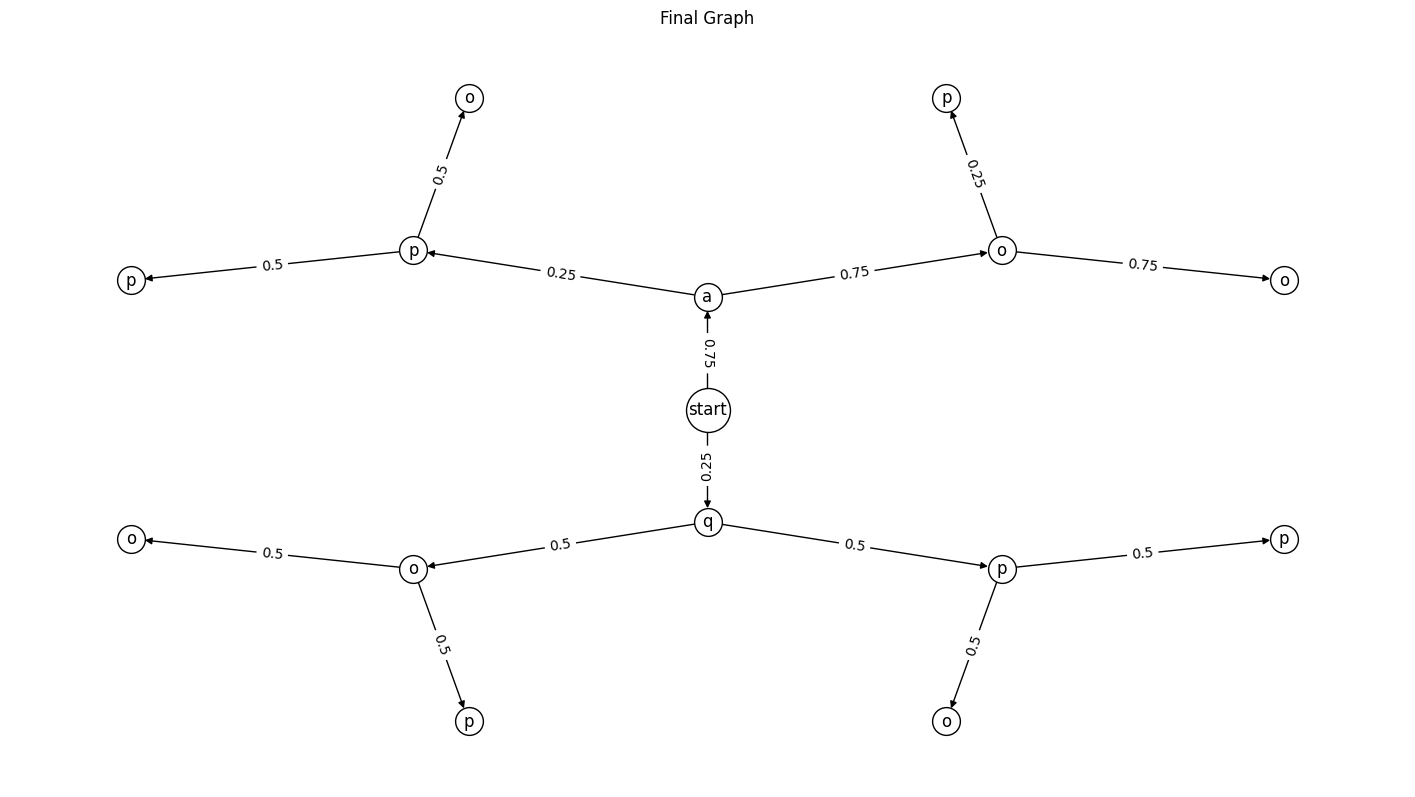

In [17]:
########## GRAFO FINALE ##########

final_distance = nx.shortest_path_length(final_graph, 0)
# print("final_distance", final_distance)

final_labels = nx.get_node_attributes(final_graph, 'value')
# print("final_labels", final_labels)

# prende tutti i percorsi anche quelli brevi (non solo quelli fino alle foglie)
all_paths = nx.shortest_path(final_graph, 0)
del all_paths[0]
print("all_paths", all_paths)

for path in all_paths:
    p = all_paths[path]
    len_p = len(p)
    # total_len è la lunghezza della tupla
    total_len = len_p + 3

    #prendo le labels dei nodi dei percorsi
    p_label = []
    for ids in p:
        p_label.append(final_labels[ids])
    # print(p_label)
    for final_tuple in all_info:
        #se la lunghezza della tupla attuale è uguale a quella del path + 3
        if len(final_tuple) == total_len:
            # prendo il path dalla tupla
            info_path = list(final_tuple[3:])

            # se è uguale al path di label sono nel percorso giusto e scrivo la weight
            if p_label == info_path:
                final_graph[p[-2]][p[-1]]['weight'] = round(final_tuple[1]/final_tuple[2], 2)

print(nx.get_edge_attributes(final_graph, 'weight'))

plt.figure(figsize=(18,10), dpi=100)
ax = plt.gca()
ax.set_title('Final Graph')

options = {"edgecolors": "k", "node_size": 400}
options_center = {"edgecolors": "k", "node_size": 1000}

pos = hierarchy_pos(final_graph, 0, width = 2*math.pi, xcenter=0)
new_pos = {u:(r*math.cos(theta),r*math.sin(theta)) for u, (theta, r) in pos.items()}

labels = nx.get_node_attributes(final_graph, 'value')
nx.draw_networkx_labels(final_graph, new_pos, labels, font_color='black')

weight = nx.get_edge_attributes(final_graph,'weight')
nx.draw_networkx_edge_labels(final_graph, new_pos, edge_labels=weight)

nx.draw(final_graph, node_color = 'white', pos=new_pos, **options, ax=ax)
nx.draw_networkx_nodes(final_graph, pos=new_pos, nodelist = [0], node_color = 'white', **options_center)

plt.savefig("C:\\Users\\giuli\\Desktop\\imageLeft\\" + "final_graph_" + word + ".png",
                bbox_inches='tight')

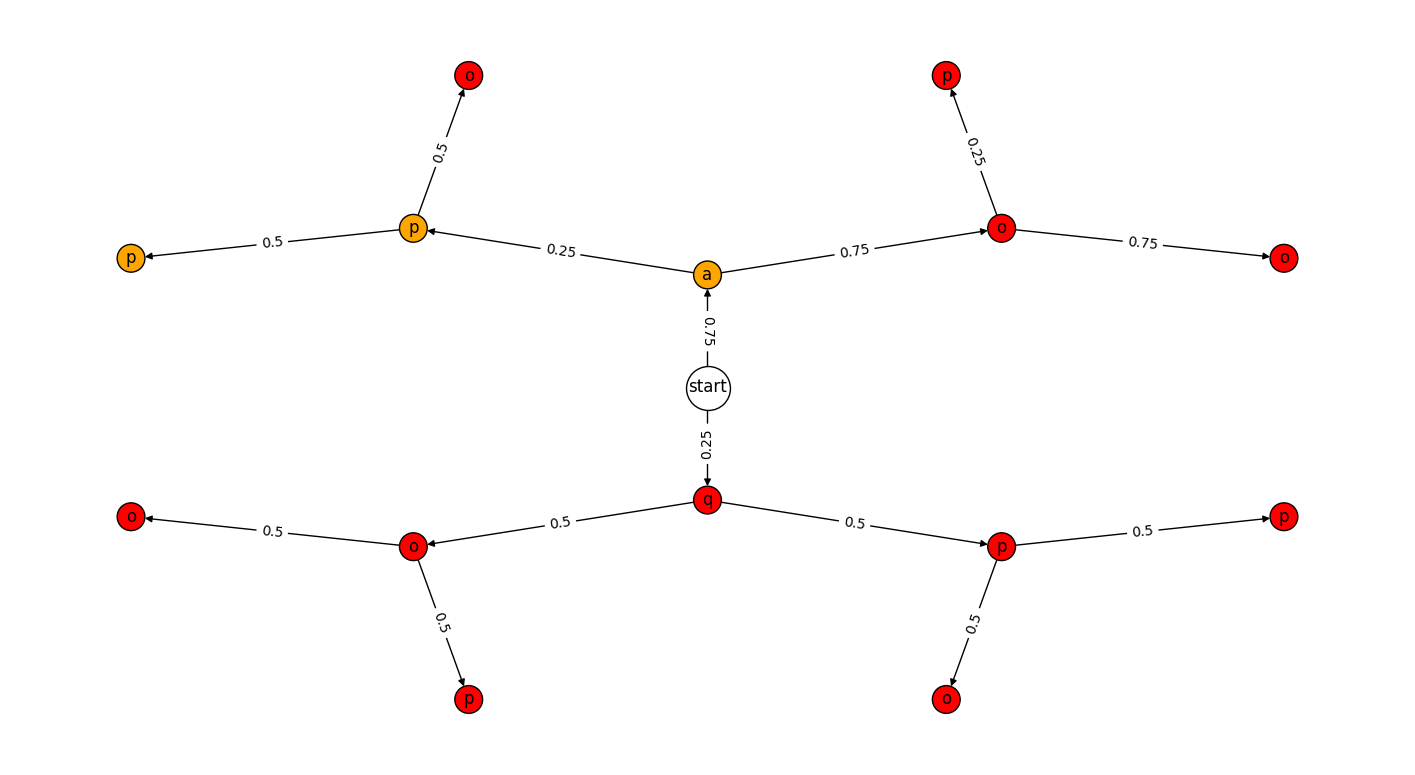

In [18]:
# cambia colore del grafo finale (ho commentato la parte per cancellare i nodi)
change_color_nodes(final_graph, final_tree_ret, word)

In [19]:
######### CLASSIFICA #########

ranking = {}
paths_ranking = []

# prendo tutti gli archi dei percorsi da radice a foglia
for t in final_graph.nodes:
    if final_graph.out_degree(t)==0: #it's a leaf
        # print(nx.shortest_path(graph, root, t))
        # paths_ranking.append(nx.shortest_path(final_graph, 0, t))
        paths_ranking.append(list(nx.all_simple_edge_paths(final_graph, 0, t)))
        # print(list(nx.all_simple_edge_paths(final_graph, 0, t)))

print(len(paths_ranking))
print(paths_ranking)

for path in paths_ranking:
    real_path = path[0]
    product_weight = 1
    tupla_ids = ()
    for p in real_path:
        tupla_ids = tupla_ids + (p[1],)

        # calcolo il prodotto degli archi
        product_weight = round(product_weight * final_graph[p[0]][p[1]]['weight'], 4)

    tupla_ids_labels = ()
    for el in tupla_ids:
        tupla_ids_labels = tupla_ids_labels + (final_labels[el],)

    # inserisco nel dizionario {tupla: valore del prodotto}
    ranking[tupla_ids_labels] = product_weight

print(ranking)

8
[[[(0, 1), (1, 2), (2, 4)]], [[(0, 1), (1, 3), (3, 5)]], [[(0, 1), (1, 2), (2, 6)]], [[(0, 1), (1, 3), (3, 7)]], [[(0, 8), (8, 9), (9, 11)]], [[(0, 8), (8, 10), (10, 12)]], [[(0, 8), (8, 9), (9, 13)]], [[(0, 8), (8, 10), (10, 14)]]]
{('a', 'o', 'o'): 0.4219, ('a', 'p', 'o'): 0.0938, ('a', 'o', 'p'): 0.1406, ('a', 'p', 'p'): 0.0938, ('q', 'o', 'o'): 0.0625, ('q', 'p', 'o'): 0.0625, ('q', 'o', 'p'): 0.0625, ('q', 'p', 'p'): 0.0625}


In [20]:
# ordino il dizionario in ordine decrescente
ranking_ordered = {k: v for k, v in sorted(ranking.items(), key=lambda item: item[1], reverse=True)}
print(ranking_ordered)
print("len(ranking_ordered) prima", len(ranking_ordered))

# salvo le parole che non esistono nel file words_alpha.txt
word_to_delete = []
for key in ranking_ordered:
    word_to_check = ''
    for c in key:
        word_to_check = word_to_check + c

    if word_to_check not in dictionary:
        # print(word_to_check)
        word_to_delete.append(key)

print("len(word_to_delete)", len(word_to_delete))

# elimino le parole inesistenti dal dizionario
for w in word_to_delete:
    del ranking_ordered[w]

print("len(ranking_ordered) dopo", len(ranking_ordered))
print(ranking_ordered)

{('a', 'o', 'o'): 0.4219, ('a', 'o', 'p'): 0.1406, ('a', 'p', 'o'): 0.0938, ('a', 'p', 'p'): 0.0938, ('q', 'o', 'o'): 0.0625, ('q', 'p', 'o'): 0.0625, ('q', 'o', 'p'): 0.0625, ('q', 'p', 'p'): 0.0625}
len(ranking_ordered) prima 8
len(word_to_delete) 7
len(ranking_ordered) dopo 1
{('a', 'p', 'p'): 0.0938}


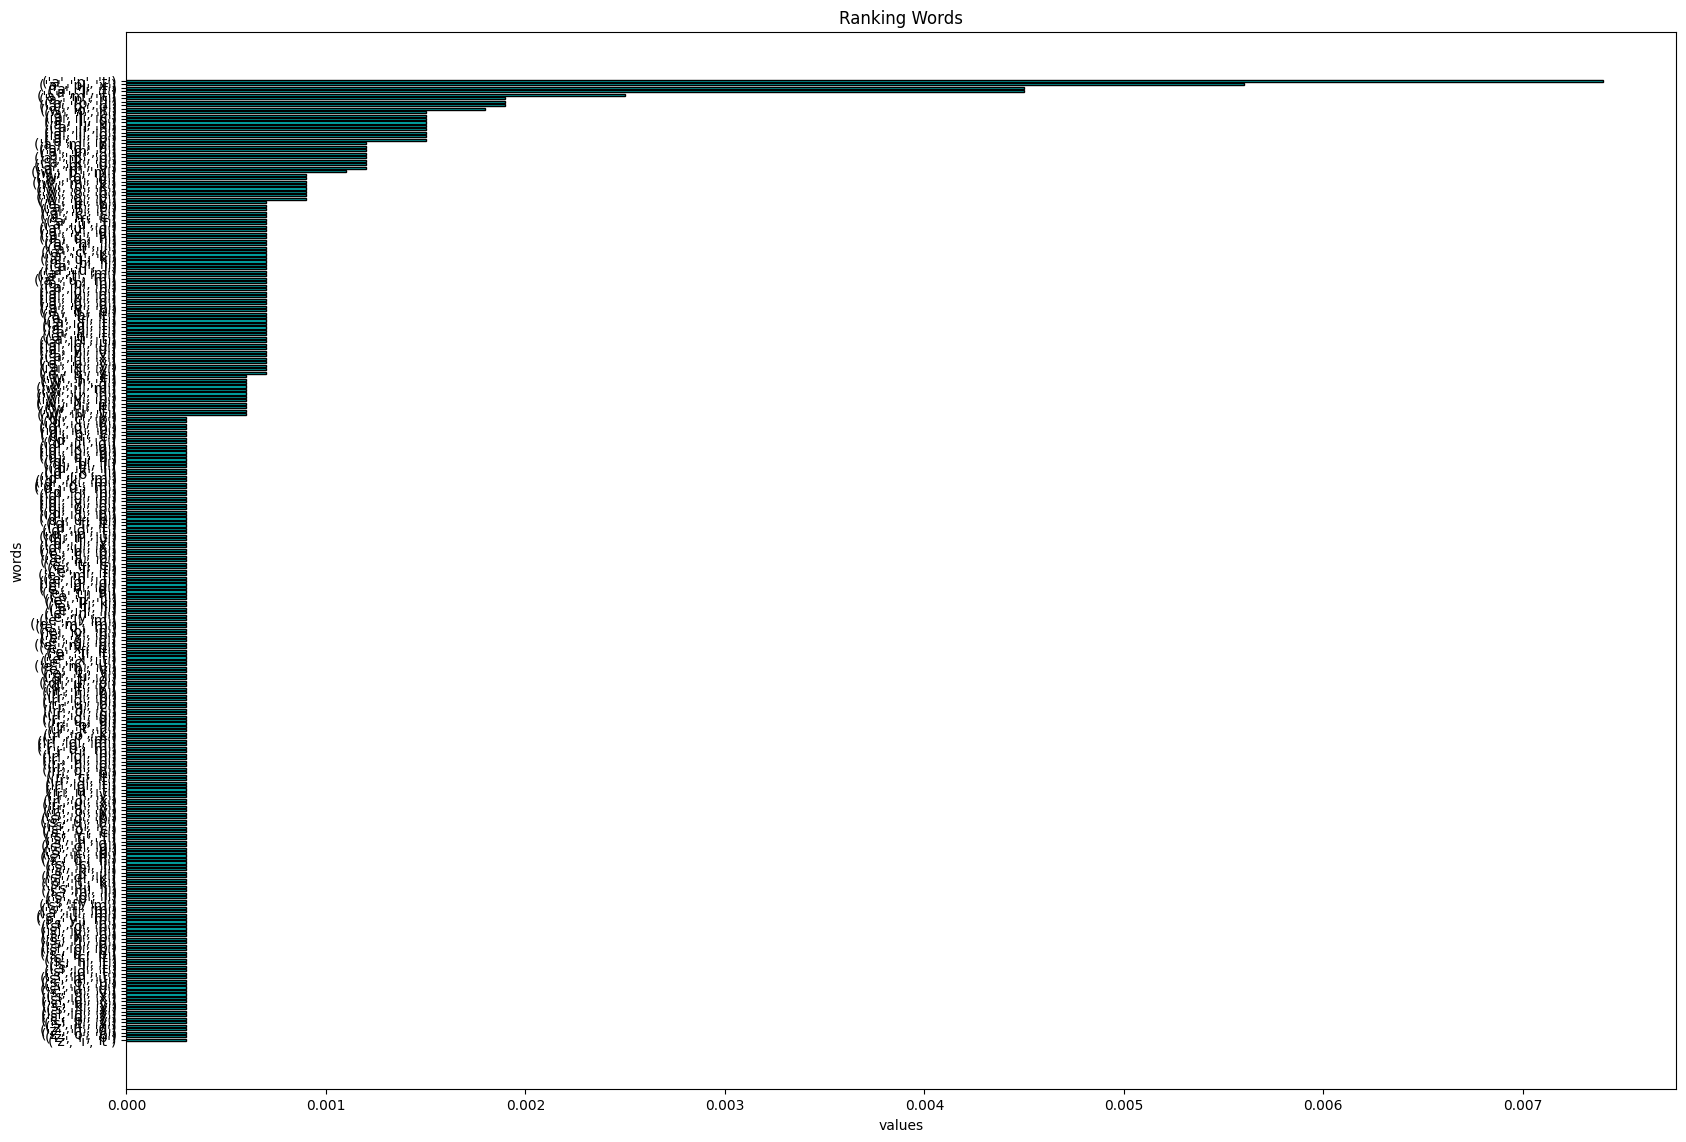

In [40]:
# Plot ranking
ranking_copy = ranking_ordered

plt.figure(figsize=(20,14), dpi=100)
plt.barh(range(len(ranking_copy)), list(reversed(ranking_copy.values())), align='center', color='c',
         edgecolor='black', height=0.6)
plt.yticks(range(len(ranking_copy)), list(reversed(ranking_copy.keys())))
plt.xlabel("values")
plt.ylabel("words")
plt.title("Ranking Words")

plt.savefig("C:\\Users\\giuli\\Desktop\\image finale\\" + "ranking.png",
                bbox_inches='tight')